In [1]:
print(hello world)

hello world


Partie 1: Mécanique céleste

In [2]:
import numpy as np
from astropy.constants import G, M_earth, M_sun 
import matplotlib.pyplot as plt
import de421
from astropy.time import Time
from jplephem import Ephemeris

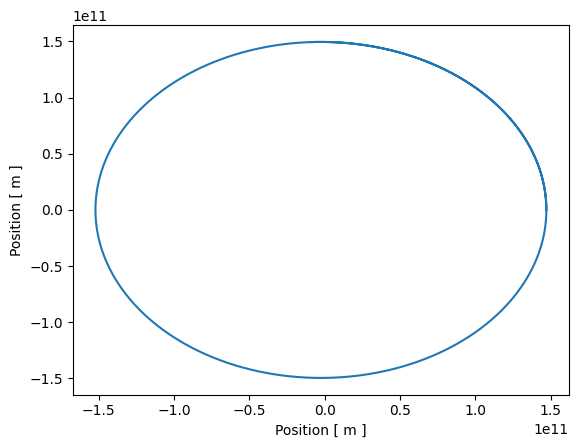

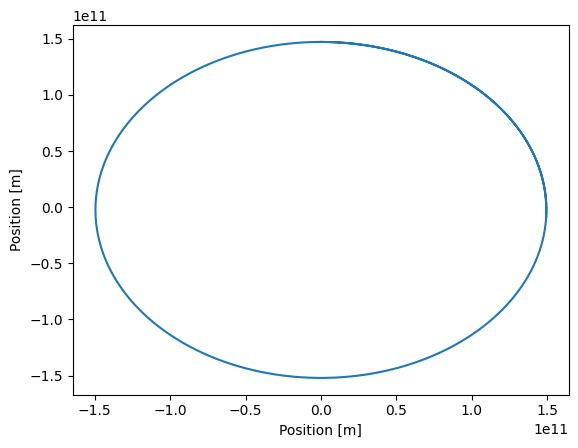

In [8]:
#a) Calcul de la méthode de Verlet
r_0 = 1.4710e11 # m
v_0 = 3.0287e4 #m/s

def f(r):
    return(-G.value * M_sun.value * r/np.linalg.norm(r)**3)
    
def verlet(r, v_1, h, max):
    
    vx=[v_1[0]]
    vy=[v_1[1]]
    x = [r[0]]
    y =[r[1]]
    
    for i in range(1, max):
        r = r + h * v_1
        k = h * f(r)
        v_2 = v_1 + 0.5 * k 
        v_1 = v_1 + k
        vx.append(v_2[0])
        vy.append(v_2[1])
        x.append(r[0])
        y.append(r[1])
             
    
    return(x,y,vx,vy)
    
    #Représentation de différents orbites (les conditions initiales varient)
    
max = 11000 # nombres d'itérations maximales
h = 3600 
r = np.array([r_0, 0])
v_1 =  np.array([0,v_0]) + 0.5 * h * f(r)
x, y, vx, vy = verlet(r, v_1, h, max) # le pas correspond a un incrément temporel de 1h en secondes 
plt.figure()
plt.plot(x, y)
plt.ylabel(Position [ m ])
plt.xlabel(Position [ m ])
plt.show()
    
    
r = np.array([0, r_0])
v_1 =  np.array([v_0,0]) + 0.5 * h * f(r)
x, y, vx,vy = verlet(r, v_1, h, max)
plt.figure()
plt.plot(x, y)
plt.ylabel(Position [m])
plt.xlabel(Position [m])
plt.show()

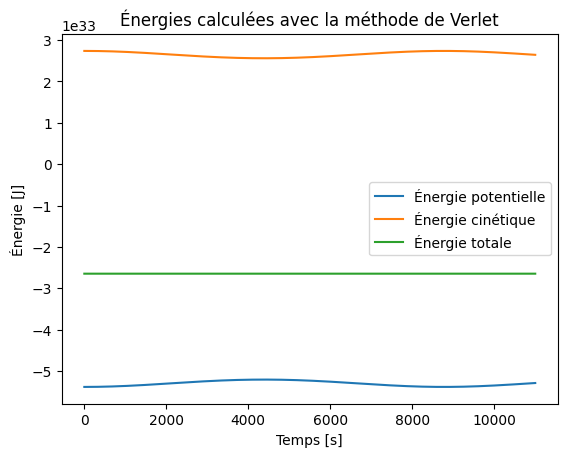

In [9]:
def verletenergie(r, v_1, h, max):
    U = [-G.value*M_sun.value*M_earth.value/np.linalg.norm(r)]
    E_k = [1/2*M_earth.value*np.linalg.norm(v_1)**2]
    E_tot = [U[0]+E_k[0]]
    
    vx=[v_1[0]]
    vy=[v_1[1]]
    x = [r[0]]
    y =[r[1]]
    
    for i in range(1, max):
        r = r + h * v_1
        k = h * f(r)
        v_2 = v_1 + 0.5 * k 
        v_1 = v_1 + k
        vx.append(v_2[0])
        vy.append(v_2[1])
        x.append(r[0])
        y.append(r[1])
    
        E_k.append(1/2*M_earth.value*np.linalg.norm(v_2)**2)
        U.append(-G.value*M_sun.value*M_earth.value/np.linalg.norm(r))
        E_tot.append(U[i] + E_k[i])
    
    return(E_k,U, E_tot)
    
    
    
r = np.array([r_0, 0])
v_1 =  np.array([0,v_0]) + 0.5 * h * f(r)
E_k, U, E_tot = verletenergie(r, v_1, 3600, max)
    
    
plt.figure()
plt.plot(range(max),U, label = Énergie potentielle)
plt.plot(range(max), E_k, label = Énergie cinétique)
plt.plot(range(max), E_tot, label = Énergie totale)
plt.title(Énergies calculées avec la méthode de Verlet)
plt.ylabel(Énergie [J])
plt.xlabel(Temps [s])
plt.legend()
plt.show()

In [ ]:
  def Euler(a, b, h, r_0, v_0): ,
        tpoints = np.arange(a,b,h),
        x = [],
        y = [],
        vx = [],
        vy = [] ,
        E_tot = [],
        r = np.array([r_0, 0]) ,
        v = np.array([0, v_0]) ,
        for t in tpoints: ,
            x.append(r[0]),
            y.append(r[1]),
            vx.append(v[0]),
            vy.append(v[1]),
            E_tot.append(-G.value*M_sun.value*M_earth.value/np.linalg.norm(r) + 1/2*M_earth.value*np.linalg.norm(v)**2),
            v += h * f(r),
            r = r + h*v,
        return(tpoints, x, y, vx, vy,  E_tot),
    ,
<<<<<<< HEAD
    plt.figure(),
    plt.title(\Méthode d'Euler\),
    plt.ylabel(\Position [m]\),
    plt.xlabel(\Temps [s]\),
    plt.plot(tpoints,rpoints),
    plt.show()
   


   def RK2(a, b, h, r_0, v_0): ,
        tpoints = np.arange(a,b,h),
        x = [],
        y = [],
        vx = [],
        vy = [] ,
        E_tot = [],
        r = np.array([r_0, 0]) ,
        v = np.array([0, v_0]) ,
        for t in tpoints: ,
            x.append(r[0]),
            y.append(r[1]),
            vx.append(v[0]),
            vy.append(v[1]),
            E_tot.append(-G.value*M_sun.value*M_earth.value/np.linalg.norm(r) + 1/2*M_earth.value*np.linalg.norm(v)**2),
            k1 = h * f(r),
            k2 = h * f(r+0.5*k1),
            v += k2,
            r = r + h*v,
        return(tpoints,x, y, vx, vy,  E_tot),
    ,
    def RK4(a, b, h, r_0, v_0): ,
        tpoints = np.arange(a,b,h),
        x = [],
        y = [],
        vx = [],
        vy = [] ,
        E_tot = [],
        r = np.array([r_0, 0]) ,
        v = np.array([0, v_0]) ,
        for t in tpoints: ,
            x.append(r[0]),
            y.append(r[1]),
            vx.append(v[0]),
            vy.append(v[1]),
            E_tot.append(-G.value*M_sun.value*M_earth.value/np.linalg.norm(r) + 1/2*M_earth.value*np.linalg.norm(v)**2),
            k1 = h * f(r),
            k2 = h * f(r+0.5*k1),
            k3 = h*f(r+0.5*k2),
            k4 = h*f(r+k3),
            v += (k1+2*k2+2*k3+k4)/6,
            r = r + h*v,
        return(tpoints,x, y, vx, vy,  E_tot),
    ,
    ,
    ,
    ,
    ,
    r = np.array([r_0, 0]),
    v_1 =  np.array([0,v_0]) + 0.5 * h * f(r),
    E_k, U, E_totVerlet = verletenergie(r, v_1, 3600, max),
    tRK2, xRK2,yRK2, vxRK2, vyRK2, ERK2 = RK2(0, 40000000, 3600, r_0, v_0),
    tRK4, xRK4,yRK4, vxRK4, vyRK4, ERK4 = RK4(0, 40000000, 3600, r_0, v_0),
    tEuler, xEuler,yEuler, vxEuler,vyEuler, EEuler = Euler(0, 40000000, 3600, r_0, v_0),
    temps = [x/3600 for x in tEuler],
    ,
    ,
    ,
    plt.figure(),
    plt.title(\Comparaison orbite Euler/RK2/RK4\),
    plt.ylabel(\Position [m]\),
    plt.xlabel(\Position [m]\),
    plt.plot(xEuler,yEuler, label = \Euler\, linestyle = \dotted\),
    plt.plot(xRK2,yRK2, label = \RK2\, linestyle = \dashed\),
    plt.plot(xRK4,yRK4, label = \RK4\, linestyle = \dashdot\),
    plt.legend(),
    plt.show(),
    ,
    ,
    plt.figure(),
    plt.title(\Comparaison énergie totale Verlet/Euler/RK2/RK4\),
    plt.ylabel(\Énergie[J]\),
    plt.xlabel(\Temps [h]\),
    plt.plot(temps,EEuler, label = \Euler\, linestyle = \dotted\),
    plt.plot(temps,ERK2, label = \RK2\, linestyle = \dashed\),
    plt.plot(temps,ERK4, label = \RK4\, linestyle = \dashdot\),
    plt.plot(range(max),E_totVerlet, label = \Verlet\),
    plt.legend(),
    plt.show()

In [ ]:
#d) Bulirsch-Stoer,
    def f(x, y):,
        return(-G.value * M_sun.value * x/((x**2+y**2)**0.5)**3, -G.value * M_sun.value * y/((x**2+y**2)**0.5)**3),
    ,
    def g(rx, ry):,
        x = rx[0],
        vx = rx[1],
        y = ry[0],
        vy = ry[1],
        fx=vx,
        fvx=f(x, y)[0],
        fy=vy,
        fvy=f(x, y)[1],
    ,
        return np.array([fx, fvx, fy, fvy],float),
    ,
    def Bulirsch(a, b, H, r_0, v_0, delta):,
        tpoints = np.arange(a, b, H),
        x = [],
        y = [],
        rx = np.array([r_0, 0.0], float),
        ry = np.array([0, v_0], float),
        ,
        for t in tpoints:,
            x.append(rx[0]),
            y.append(ry[0]),
            vx.append(rx[1]),
            vy.append(ry[1]),
            n = 1,
    ,
            r1x = rx + 0.5*H*g(rx, ry)[0:2],
            r1y = ry + 0.5*H*g(rx, ry)[2:4],
            r2x = rx + H*g(r1x, r1y)[0:2],
            r2y = ry + H*g(r1x, r1y)[2:4],
    ,
            R1x = np.empty([1,2],float),
            R1x[0] = 0.5*(r1x+r2x+0.5*H*g(r2x, r2y)[0:2]),
    ,
    ,
    ,
    ,
            R1y = np.empty([1,2],float),
            R1y[0] = 0.5*(r1y+r2y+0.5*H*g(r2x, r2y)[2:4]),
    ,
            errorx = errory = 2*H*delta,
            while errorx > H*delta and errory > H*delta:,
                n += 1,
                h = H/n,
    ,
                r1x = rx + 0.5*h*g(rx, ry)[0:2],
                r1y = ry + 0.5*h*g(rx, ry)[2:4],
                r2x = rx + h*g(r1x, r1y)[0:2],
                r2y = ry + h*g(r1x,r1y)[2:4],
    ,
                for i in range(n-1):,
                    r1x += h*g(r2x, r2y)[0:2],
                    r1y += h*g(r2x ,r2y)[2:4],
                    r2x += h*g(r1x, r1y)[0:2],
                    r2y += h*g(r1x ,r1y)[2:4],
    ,
                R2x = R1x,
                R2y = R1y,
    ,
                R1x = np.empty([n,2], float),
                R1x[0] = 0.5*(r1x+r2x+0.5*h*g(r2x, r2y)[0:2]),
                R1y = np.empty([n,2], float),
                R1y[0] = 0.5*(r1y+r2y+0.5*h*g(r2x ,r2y)[2:4]),
    ,
                for m in range (1, n):,
                    epsilonx = (R1x[m-1]-R2x[m-1])/((n/(n-1))**(2*m)-1),
                    R1x[m] = R1x[m-1] + epsilonx,
                    epsilony = (R1y[m-1]-R2y[m-1])/((n/(n-1))**(2*m)-1),
                    R1y[m] = R1y[m-1] + epsilony,
                errorx = abs(epsilonx[0]),
                errory = abs(epsilony[0]),
    ,
            rx = R1x[n-1],
            ry = R1y[n-1]                    ,
        return(x,y,vx, vy, tpoints),
    ,
    r_0 = 1.4710e11 # m,
    v_0 = 3.0287e4 #m/s,
    ,
    xBur, yBur,vxbur, vybur, tBur = Bulirsch(0, 400000000, 3600*24*7, r_0, v_0, 1000/(365*24*3600)),
    ,
    plt.title(\Comparaison orbites obtenus avec la Bulirsch-Stoer vs Euler\),
    plt.plot(xBur, yBur, label = \Bulirsch-Stoer\, linestyle=\dashed\),
    plt.plot(xEuler, yEuler, label=\Euler\, linestyle=\dotted\),
    plt.ylabel(\y [m]\),
    plt.xlabel(\x [m]\),
    plt.legend(),
    plt.show()

In [ ]:
eph = Ephemeris(de421),
    # dates,
    lancement=Time(\2020-07-30\),
    atterissage=Time(\2021-02-18\),
    # un nombre de jours juliens est attendu par la routine, d’o`u le .jd,
    # position en km, vitesse en km par jour,
    position, velocity = eph.position_and_velocity('mars',lancement.jd),
    a = ((position[0]**2)+(position[1]**2)+(position[2]**2))**0.5,
    print(a),
    #b = ((velocity[0]**2)+(velocity[1]**2)+(velocity[2]**2))**0.5,
    #r_0 = float(a*1000),
    #v_0 = float(b/86.4),
    ,
    #print(r_0, v_0),
    ,
    r_0x = float(position[0]*1000),
    v_0x = float(velocity[0]/86.4),
    ,
    r_0y = float(position[1]*1000),
    v_0y = float(velocity[1]/86.4),
    ,
    r_0z = float(position[2]*1000),
    v_0z = float(velocity[2]/86.4),
    ,
    ,
    def f(r):,
        return((-G.value * M_sun.value * r/r_0**3)) ,
    ,
    def g(r):,
        x = r[0],
        v = r[1],
        fx=v,
        fv=f(x),
        return np.array([fx, fv],float),
    ,
    rx, tx = Bulirsch(0, 687*24*60*60, 30000, r_0x, v_0x, 900/(365*24*3600)),
    ,
    plt.plot(tx, rx),
    plt.show(),
    ,
    ry, ty = Bulirsch(0, 687*24*60*60, 30000, r_0y, v_0y, 900/(365*24*3600)),
    ,
    plt.plot(ty, ry),
    plt.show(),
    ,
    rz, tz = Bulirsch(0, 687*24*60*60, 30000, r_0z, v_0z, 900/(365*24*3600)),
    ,
    plt.plot(tz, rz),
    plt.show(),
    ,
    position_fin = eph.position('mars',atterissage.jd),
    print(((position_fin[0]**2)+(position_fin[1]**2)+(position_fin[2]**2))**0.5),
    print((rx[-1]**2+ry[-1]**2+rz[-1]**2)**0.5)